In [1]:
import pandas as pd
from functions import header_df, frequency_analysis, word_cloud

In [2]:
donors = pd.read_excel('../data/Role of Donors - opening.xlsx', header=None)
donors.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Note: there are more sheets in this document,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Each session is found on its own sheet below. ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Date,Session,Voter,"If you want to change the world, throw a bette...",Welcome to the Pitch Tent!:,:,Where are you calling from?: x,Where are you calling from?: y,I (choose all that apply):: 1,I (choose all that apply):: 2,...,What can donors do besides give money?: 1,What can donors do besides give money?: 2,What can donors do besides give money?: 3,What can donors do besides give money?: 4,What can donors do besides give money?: 5,What challenges might donors face in adopting ...,What challenges might donors face in adopting ...,What challenges might donors face in adopting ...,What challenges might donors face in adopting ...,What challenges might donors face in adopting ...
3,2023-06-14,1,1,NaN,NaN,NaN,0.2156,0.3234,work in philanthropy,am a trustee or board member,...,"Share time, supplies & equipment, talents, vis...",volunteer at a community event,share equipment and resources,share grant opportunities,bring new potential individual who may be a vo...,Limited time and $$,No access to transportation to get to our spaces,Language barriers,Child care needs,Varied capacity on all levels
4,2023-06-14,1,2,NaN,NaN,NaN,0.4292,0.8874,work in philanthropy,NaN,...,Trust,Give advice on proposals,NaN,NaN,NaN,"Managing our managers, serving as buffers betw...",NaN,NaN,NaN,NaN


In [3]:
donors = header_df(donors)
donors.head()

2,Date,Session,Voter,"If you want to change the world, throw a better party!:",Welcome to the Pitch Tent!:,:,Where are you calling from?: x,Where are you calling from?: y,I (choose all that apply):: 1,I (choose all that apply):: 2,...,What can donors do besides give money?: 1,What can donors do besides give money?: 2,What can donors do besides give money?: 3,What can donors do besides give money?: 4,What can donors do besides give money?: 5,What challenges might donors face in adopting such roles?: 1,What challenges might donors face in adopting such roles?: 2,What challenges might donors face in adopting such roles?: 3,What challenges might donors face in adopting such roles?: 4,What challenges might donors face in adopting such roles?: 5
0,2023-06-14,1,1,NaN,NaN,NaN,0.2156,0.3234,work in philanthropy,am a trustee or board member,...,"Share time, supplies & equipment, talents, vis...",volunteer at a community event,share equipment and resources,share grant opportunities,bring new potential individual who may be a vo...,Limited time and $$,No access to transportation to get to our spaces,Language barriers,Child care needs,Varied capacity on all levels
1,2023-06-14,1,2,NaN,NaN,NaN,0.4292,0.8874,work in philanthropy,NaN,...,Trust,Give advice on proposals,NaN,NaN,NaN,"Managing our managers, serving as buffers betw...",NaN,NaN,NaN,NaN
2,2023-06-14,1,3,NaN,NaN,NaN,0.5108,0.3112,work in philanthropy,NaN,...,"provide information, contacts, networks",NaN,NaN,NaN,NaN,lack of ressources,NaN,NaN,NaN,NaN
3,2023-06-14,1,4,NaN,NaN,NaN,NaN,NaN,work in philanthropy,NaN,...,Give advice,Be a friend,NaN,NaN,NaN,Unsure of the environment,"Its messy, takes a long time",NaN,NaN,NaN
4,2023-06-14,1,5,NaN,NaN,NaN,NaN,NaN,something else,NaN,...,Help connect actors working in a shared ecosystem,NaN,NaN,NaN,NaN,Money still hangs over everything,NaN,NaN,NaN,NaN


# Renaming the Necessary Columns

In [4]:
# category columns
donors = donors.rename(columns={'I (choose all that apply):: 1': 'first_category'})
donors = donors.rename(columns={'I (choose all that apply):: 2': 'second_category'})
donors = donors.rename(columns={'I (choose all that apply):: 3': 'third_category'})

# action columns
donors = donors.rename(columns={'What can donors do besides give money?: 1': 'action_1'})
donors = donors.rename(columns={'What can donors do besides give money?: 2': 'action_2'})
donors = donors.rename(columns={'What can donors do besides give money?: 3': 'action_3'})
donors = donors.rename(columns={'What can donors do besides give money?: 4': 'action_4'})
donors = donors.rename(columns={'What can donors do besides give money?: 5': 'action_5'})
donors.head()

2,Date,Session,Voter,"If you want to change the world, throw a better party!:",Welcome to the Pitch Tent!:,:,Where are you calling from?: x,Where are you calling from?: y,first_category,second_category,...,action_1,action_2,action_3,action_4,action_5,What challenges might donors face in adopting such roles?: 1,What challenges might donors face in adopting such roles?: 2,What challenges might donors face in adopting such roles?: 3,What challenges might donors face in adopting such roles?: 4,What challenges might donors face in adopting such roles?: 5
0,2023-06-14,1,1,NaN,NaN,NaN,0.2156,0.3234,work in philanthropy,am a trustee or board member,...,"Share time, supplies & equipment, talents, vis...",volunteer at a community event,share equipment and resources,share grant opportunities,bring new potential individual who may be a vo...,Limited time and $$,No access to transportation to get to our spaces,Language barriers,Child care needs,Varied capacity on all levels
1,2023-06-14,1,2,NaN,NaN,NaN,0.4292,0.8874,work in philanthropy,NaN,...,Trust,Give advice on proposals,NaN,NaN,NaN,"Managing our managers, serving as buffers betw...",NaN,NaN,NaN,NaN
2,2023-06-14,1,3,NaN,NaN,NaN,0.5108,0.3112,work in philanthropy,NaN,...,"provide information, contacts, networks",NaN,NaN,NaN,NaN,lack of ressources,NaN,NaN,NaN,NaN
3,2023-06-14,1,4,NaN,NaN,NaN,NaN,NaN,work in philanthropy,NaN,...,Give advice,Be a friend,NaN,NaN,NaN,Unsure of the environment,"Its messy, takes a long time",NaN,NaN,NaN
4,2023-06-14,1,5,NaN,NaN,NaN,NaN,NaN,something else,NaN,...,Help connect actors working in a shared ecosystem,NaN,NaN,NaN,NaN,Money still hangs over everything,NaN,NaN,NaN,NaN


In [5]:
# challenge columns
donor = donors.rename(columns={'What challenges might donors face in adopting such roles?: 1': 'challenge_1'})
donor = donors.rename(columns={'What challenges might donors face in adopting such roles?: 2': 'challenge_2'})
donor = donors.rename(columns={'What challenges might donors face in adopting such roles?: 3': 'challenge_3'})
donor = donors.rename(columns={'What challenges might donors face in adopting such roles?: 4': 'challenge_4'})
donor = donors.rename(columns={'What challenges might donors face in adopting such roles?: 5': 'challenge_5'})

In [6]:
donors.columns

Index(['Date', 'Session', 'Voter',
       'If you want to change the world, throw a better party!:',
       'Welcome to the Pitch Tent!:', ':', 'Where are you calling from?: x',
       'Where are you calling from?: y', 'first_category', 'second_category',
       'third_category', 'action_1', 'action_2', 'action_3', 'action_4',
       'action_5',
       'What challenges might donors face in adopting such roles?: 1',
       'What challenges might donors face in adopting such roles?: 2',
       'What challenges might donors face in adopting such roles?: 3',
       'What challenges might donors face in adopting such roles?: 4',
       'What challenges might donors face in adopting such roles?: 5'],
      dtype='object', name=2)

# Extracting Only the Necessary Columns

In [7]:
new_donors = donors[['first_category', 
                     'second_category', 
                     'third_category', 
                     'action_1', 
                     'action_2', 
                     'action_3', 
                     'action_4', 
                     'action_5', 
                     'What challenges might donors face in adopting such roles?: 1', 
                     'What challenges might donors face in adopting such roles?: 2', 
                     'What challenges might donors face in adopting such roles?: 3', 
                     'What challenges might donors face in adopting such roles?: 4', 
                     'What challenges might donors face in adopting such roles?: 5']]
new_donors.head()

2,first_category,second_category,third_category,action_1,action_2,action_3,action_4,action_5,What challenges might donors face in adopting such roles?: 1,What challenges might donors face in adopting such roles?: 2,What challenges might donors face in adopting such roles?: 3,What challenges might donors face in adopting such roles?: 4,What challenges might donors face in adopting such roles?: 5
0,work in philanthropy,am a trustee or board member,lead or coordinate a network,"Share time, supplies & equipment, talents, vis...",volunteer at a community event,share equipment and resources,share grant opportunities,bring new potential individual who may be a vo...,Limited time and $$,No access to transportation to get to our spaces,Language barriers,Child care needs,Varied capacity on all levels
1,work in philanthropy,NaN,NaN,Trust,Give advice on proposals,NaN,NaN,NaN,"Managing our managers, serving as buffers betw...",NaN,NaN,NaN,NaN
2,work in philanthropy,NaN,NaN,"provide information, contacts, networks",NaN,NaN,NaN,NaN,lack of ressources,NaN,NaN,NaN,NaN
3,work in philanthropy,NaN,NaN,Give advice,Be a friend,NaN,NaN,NaN,Unsure of the environment,"Its messy, takes a long time",NaN,NaN,NaN
4,something else,NaN,NaN,Help connect actors working in a shared ecosystem,NaN,NaN,NaN,NaN,Money still hangs over everything,NaN,NaN,NaN,NaN


In [8]:
len(new_donors)

22

## Philanthropy Group

In [9]:
philanthropy = new_donors[new_donors['first_category'] == 'work in philanthropy']
philanthropy.head()

2,first_category,second_category,third_category,action_1,action_2,action_3,action_4,action_5,What challenges might donors face in adopting such roles?: 1,What challenges might donors face in adopting such roles?: 2,What challenges might donors face in adopting such roles?: 3,What challenges might donors face in adopting such roles?: 4,What challenges might donors face in adopting such roles?: 5
0,work in philanthropy,am a trustee or board member,lead or coordinate a network,"Share time, supplies & equipment, talents, vis...",volunteer at a community event,share equipment and resources,share grant opportunities,bring new potential individual who may be a vo...,Limited time and $$,No access to transportation to get to our spaces,Language barriers,Child care needs,Varied capacity on all levels
1,work in philanthropy,NaN,NaN,Trust,Give advice on proposals,NaN,NaN,NaN,"Managing our managers, serving as buffers betw...",NaN,NaN,NaN,NaN
2,work in philanthropy,NaN,NaN,"provide information, contacts, networks",NaN,NaN,NaN,NaN,lack of ressources,NaN,NaN,NaN,NaN
3,work in philanthropy,NaN,NaN,Give advice,Be a friend,NaN,NaN,NaN,Unsure of the environment,"Its messy, takes a long time",NaN,NaN,NaN
6,work in philanthropy,NaN,NaN,Back off :),NaN,NaN,NaN,NaN,Autonomy (lack of) within various institutions.,NaN,NaN,NaN,NaN


In [10]:
print(len(philanthropy))

10


In [11]:
new_donors['first_category'].value_counts()

work in philanthropy            10
lead or coordinate a network     4
something else                   2
support networks or funders      2
am a trustee or board member     2
Name: first_category, dtype: int64

## Network Lead Group

In [12]:
network_lead = new_donors[new_donors['first_category'] == 'lead or coordinate a network']
network_lead.head()

2,first_category,second_category,third_category,action_1,action_2,action_3,action_4,action_5,What challenges might donors face in adopting such roles?: 1,What challenges might donors face in adopting such roles?: 2,What challenges might donors face in adopting such roles?: 3,What challenges might donors face in adopting such roles?: 4,What challenges might donors face in adopting such roles?: 5
7,lead or coordinate a network,am a trustee or board member,work in philanthropy,Accompany grantees,NaN,NaN,NaN,NaN,limited Human Resources,NaN,NaN,NaN,NaN
8,lead or coordinate a network,NaN,NaN,share their networks,NaN,NaN,NaN,NaN,mentor,shortage of time,NaN,NaN,NaN
12,lead or coordinate a network,NaN,NaN,Listen,Be curious about our experience and be humble ...,NaN,NaN,NaN,Habit and tradition,NaN,NaN,NaN,NaN
16,lead or coordinate a network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Something Else Group

In [13]:
something_else = new_donors[new_donors['first_category'] == 'something else']
something_else.head()

2,first_category,second_category,third_category,action_1,action_2,action_3,action_4,action_5,What challenges might donors face in adopting such roles?: 1,What challenges might donors face in adopting such roles?: 2,What challenges might donors face in adopting such roles?: 3,What challenges might donors face in adopting such roles?: 4,What challenges might donors face in adopting such roles?: 5
4,something else,NaN,NaN,Help connect actors working in a shared ecosystem,NaN,NaN,NaN,NaN,Money still hangs over everything,NaN,NaN,NaN,NaN
17,something else,NaN,NaN,Explain what matters most to them. Why fund X...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Support Network or Funders Group

In [14]:
support_network = new_donors[new_donors['first_category'] == 'support networks or funders']
support_network.head()

2,first_category,second_category,third_category,action_1,action_2,action_3,action_4,action_5,What challenges might donors face in adopting such roles?: 1,What challenges might donors face in adopting such roles?: 2,What challenges might donors face in adopting such roles?: 3,What challenges might donors face in adopting such roles?: 4,What challenges might donors face in adopting such roles?: 5
5,support networks or funders,lead or coordinate a network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,support networks or funders,work in philanthropy,NaN,"make introductions, give feedback on complex c...",NaN,NaN,NaN,NaN,take on a collaborator/co-creating role,NaN,NaN,NaN,NaN


## Trustee or Board Member Group

In [15]:
trustee = new_donors[new_donors['first_category'] == 'am a trustee or board member']
trustee.head()

2,first_category,second_category,third_category,action_1,action_2,action_3,action_4,action_5,What challenges might donors face in adopting such roles?: 1,What challenges might donors face in adopting such roles?: 2,What challenges might donors face in adopting such roles?: 3,What challenges might donors face in adopting such roles?: 4,What challenges might donors face in adopting such roles?: 5
11,am a trustee or board member,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,am a trustee or board member,lead or coordinate a network,NaN,"Brainshare is super important, collaborating",NaN,NaN,NaN,NaN,Note wanting to be too involved and interactiv...,NaN,NaN,NaN,NaN


# Word Frequency Analysis on Each Group

### Importing the Required Libraries

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

### Philanthropy Group

In [17]:
stripped = frequency_analysis(philanthropy, 'action_1')
stripped

['share',
 'time',
 'supplies',
 'equipment',
 'talents',
 'visit',
 'events',
 'advocate',
 'community',
 'agencytrustprovide',
 'information',
 'contacts',
 'networksgive',
 'adviceback',
 'participate',
 'consultationsmake',
 'connections',
 'thought',
 'partnership',
 'supporting',
 'learning',
 'trainingprovide',
 'introductions',
 'access',
 'tools',
 'experiencesconnect',
 'networks',
 'wealthbe',
 'sounding',
 'boards',
 'grantee',
 'partners']

In [18]:
stripped = [word for phrase in stripped for word in phrase.split('trust')]
stripped.append('trust')
stripped = [word for phrase in stripped for word in phrase.split('give')]
stripped.append('give')
stripped = [word for phrase in stripped for word in phrase.split('back')]
stripped = [word for phrase in stripped for word in phrase.split('make')]
stripped = [word for phrase in stripped for word in phrase.split('connect')]
stripped.append('connect')
stripped = [word for phrase in stripped for word in phrase.split('be')]
stripped = list(filter(None, stripped))
stripped

['share',
 'time',
 'supplies',
 'equipment',
 'talents',
 'visit',
 'events',
 'advocate',
 'community',
 'agency',
 'provide',
 'information',
 'contacts',
 'networks',
 'advice',
 'participate',
 'consultations',
 'ions',
 'thought',
 'partnership',
 'supporting',
 'learning',
 'trainingprovide',
 'introductions',
 'access',
 'tools',
 'experiences',
 'networks',
 'wealth',
 'sounding',
 'boards',
 'grantee',
 'partners',
 'trust',
 'give',
 'connect']

### Performing the Analysis on the Philanthropy Group for Second Action

In [19]:
philanthropy2 = philanthropy.copy()

# removing rows with nan entries
philanthropy2 = philanthropy.dropna(subset=['action_2'])
philanthropy2

2,first_category,second_category,third_category,action_1,action_2,action_3,action_4,action_5,What challenges might donors face in adopting such roles?: 1,What challenges might donors face in adopting such roles?: 2,What challenges might donors face in adopting such roles?: 3,What challenges might donors face in adopting such roles?: 4,What challenges might donors face in adopting such roles?: 5
0,work in philanthropy,am a trustee or board member,lead or coordinate a network,"Share time, supplies & equipment, talents, vis...",volunteer at a community event,share equipment and resources,share grant opportunities,bring new potential individual who may be a vo...,Limited time and $$,No access to transportation to get to our spaces,Language barriers,Child care needs,Varied capacity on all levels
1,work in philanthropy,NaN,NaN,Trust,Give advice on proposals,NaN,NaN,NaN,"Managing our managers, serving as buffers betw...",NaN,NaN,NaN,NaN
3,work in philanthropy,NaN,NaN,Give advice,Be a friend,NaN,NaN,NaN,Unsure of the environment,"Its messy, takes a long time",NaN,NaN,NaN
14,work in philanthropy,NaN,NaN,participate in consultations,give advice,make connections,NaN,NaN,knowing what grantees really want,time constraints and equity constraints-- we c...,lack of training,NaN,NaN
18,work in philanthropy,NaN,NaN,"Make connections, thought partnership, support...",Trust the grantees,NaN,NaN,NaN,power dynamics,limited capacity,NaN,NaN,NaN
21,work in philanthropy,NaN,NaN,Be sounding boards for their grantee partners,Provide mentorship,NaN,NaN,NaN,Sometimes donors have their own donors they ne...,Limited financial and human resources for ever...,NaN,NaN,NaN


In [20]:
stripped2 = frequency_analysis(philanthropy2, 'action_2')
stripped2

['volunteer',
 'community',
 'eventgive',
 'advice',
 'proposalsbe',
 'friendgive',
 'advicetrust',
 'granteesprovide',
 'mentorship']

In [21]:
stripped2 = [word for phrase in stripped2 for word in phrase.split('give')]
stripped2.append('give')
stripped2 = [word for phrase in stripped2 for word in phrase.split('be')]
stripped2 = [word for phrase in stripped2 for word in phrase.split('trust')]
stripped2.append('trust')
stripped2 = [word for phrase in stripped2 for word in phrase.split('provide')]
stripped2 = list(filter(None, stripped2))
stripped2

['volunteer',
 'community',
 'event',
 'advice',
 'proposals',
 'friend',
 'advice',
 'grantees',
 'mentorship',
 'give',
 'trust']

### New Combined List of Words (Action1 + Action2)

In [22]:
# combining lists
new_stripped = stripped + stripped2
new_stripped.remove('ions')

### Performing the Analysis on the Philanthropy Group for Third Action

In [23]:
philanthropy3 = philanthropy.copy()

# removing rows with nan entries
philanthropy3 = philanthropy.dropna(subset=['action_3'])
philanthropy3

2,first_category,second_category,third_category,action_1,action_2,action_3,action_4,action_5,What challenges might donors face in adopting such roles?: 1,What challenges might donors face in adopting such roles?: 2,What challenges might donors face in adopting such roles?: 3,What challenges might donors face in adopting such roles?: 4,What challenges might donors face in adopting such roles?: 5
0,work in philanthropy,am a trustee or board member,lead or coordinate a network,"Share time, supplies & equipment, talents, vis...",volunteer at a community event,share equipment and resources,share grant opportunities,bring new potential individual who may be a vo...,Limited time and $$,No access to transportation to get to our spaces,Language barriers,Child care needs,Varied capacity on all levels
14,work in philanthropy,NaN,NaN,participate in consultations,give advice,make connections,NaN,NaN,knowing what grantees really want,time constraints and equity constraints-- we c...,lack of training,NaN,NaN


In [24]:
stripped3 = frequency_analysis(philanthropy3, 'action_3')
stripped3

['share', 'equipment', 'resourcesmake', 'connections']

In [25]:
stripped3 = [word for phrase in stripped3 for word in phrase.split('make')]
stripped3 = list(filter(None, stripped3))
stripped3

['share', 'equipment', 'resources', 'connections']

### New Combined List of Words (Action1 + Action2 + Action3)

In [26]:
new_stripped = new_stripped + stripped3

### Performing the Analysis on the Philanthropy Group for Fourth Action

In [27]:
philanthropy4 = philanthropy.copy()

# removing rows with nan entries
philanthropy4 = philanthropy.dropna(subset=['action_4'])
philanthropy4

2,first_category,second_category,third_category,action_1,action_2,action_3,action_4,action_5,What challenges might donors face in adopting such roles?: 1,What challenges might donors face in adopting such roles?: 2,What challenges might donors face in adopting such roles?: 3,What challenges might donors face in adopting such roles?: 4,What challenges might donors face in adopting such roles?: 5
0,work in philanthropy,am a trustee or board member,lead or coordinate a network,"Share time, supplies & equipment, talents, vis...",volunteer at a community event,share equipment and resources,share grant opportunities,bring new potential individual who may be a vo...,Limited time and $$,No access to transportation to get to our spaces,Language barriers,Child care needs,Varied capacity on all levels


In [28]:
stripped4 = frequency_analysis(philanthropy4, 'action_4')
stripped4

['share', 'grant', 'opportunities']

### New Combined List of Words (Action1 + Action2 + Action3 + Action4)

In [29]:
new_stripped = new_stripped + stripped4

### Performing the Analysis on the Philanthropy Group for Fifth Action

In [30]:
philanthropy5 = philanthropy.copy()

# removing rows with nan entries
philanthropy5 = philanthropy.dropna(subset=['action_5'])
philanthropy5

2,first_category,second_category,third_category,action_1,action_2,action_3,action_4,action_5,What challenges might donors face in adopting such roles?: 1,What challenges might donors face in adopting such roles?: 2,What challenges might donors face in adopting such roles?: 3,What challenges might donors face in adopting such roles?: 4,What challenges might donors face in adopting such roles?: 5
0,work in philanthropy,am a trustee or board member,lead or coordinate a network,"Share time, supplies & equipment, talents, vis...",volunteer at a community event,share equipment and resources,share grant opportunities,bring new potential individual who may be a vo...,Limited time and $$,No access to transportation to get to our spaces,Language barriers,Child care needs,Varied capacity on all levels


In [31]:
stripped5 = frequency_analysis(philanthropy5, 'action_5')
stripped5

['bring', 'new', 'potential', 'individual', 'may', 'volunteer', 'client']

In [32]:
removed = ['bring', 'new', 'may']
for x in removed:
    stripped5.remove(x)

### New Combined List of Words (Action1 + Action2 + Action3 + Action4 + Action5)

In [33]:
new_stripped = new_stripped + stripped5

# Word Cloud Visualization for the Philanthropy Group

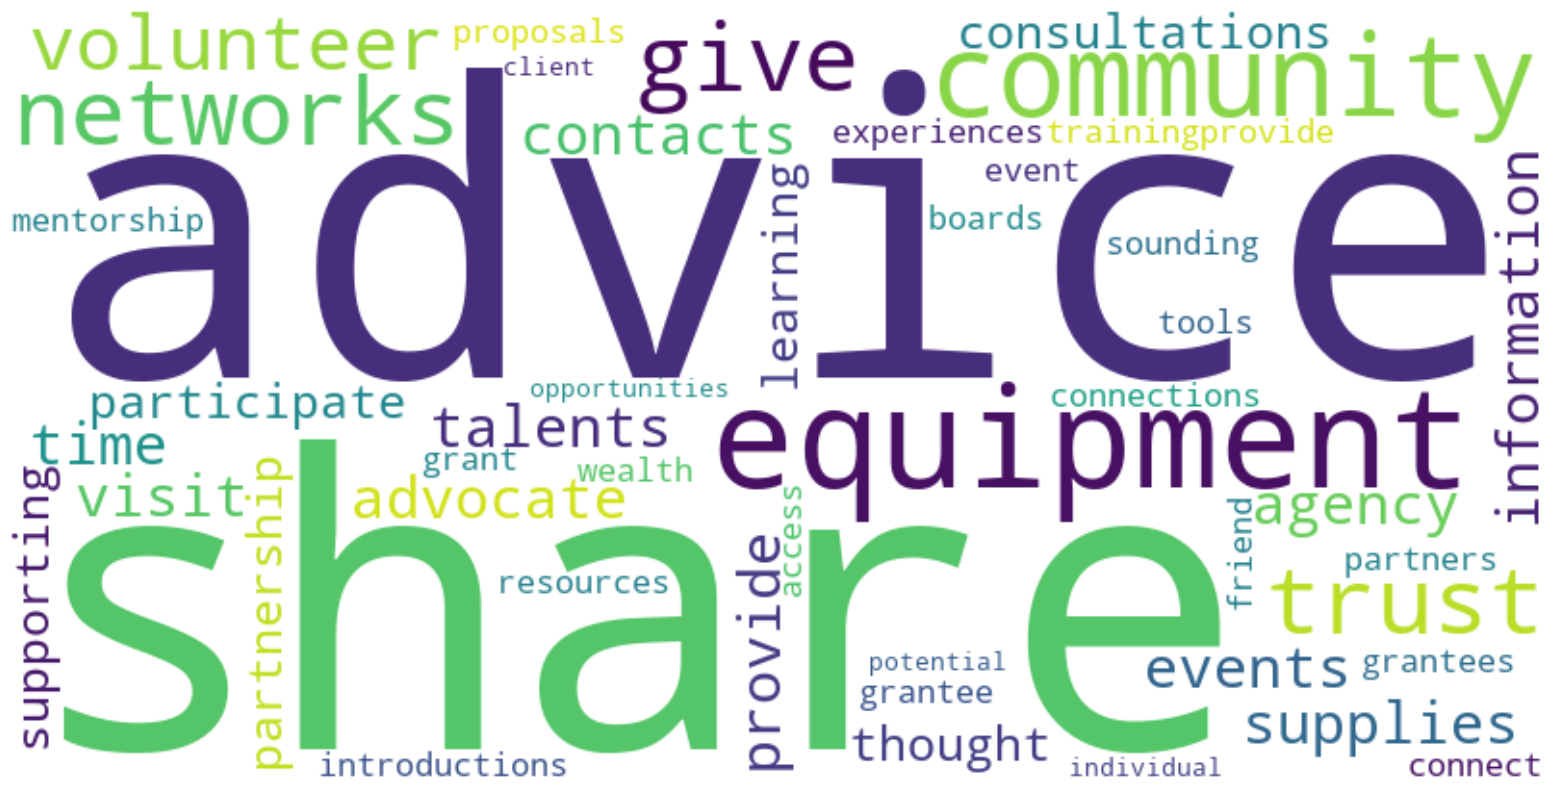

In [34]:
text = 'philanthropy'
word_cloud(text, new_stripped)

### Network Lead Group

In [38]:
# dropping nan values
network1 = network_lead.dropna(subset=['action_1'])
network2 = network_lead.dropna(subset=['action_2'])
network3 = network_lead.dropna(subset=['action_3'])
network4 = network_lead.dropna(subset=['action_4'])
network5 = network_lead.dropna(subset=['action_5'])

In [39]:
network_stripped = frequency_analysis(network1, 'action_1') + frequency_analysis(network2, 'action_2') + frequency_analysis(network3, 'action_3') + frequency_analysis(network4, 'action_4') + frequency_analysis(network5, 'action_5')
network_stripped

['accompany',
 'granteesshare',
 'networkslisten',
 'curious',
 'experience',
 'humble',
 'innovative',
 'organic',
 'nontechnical',
 'ways',
 'support',
 'indigenous',
 'efforts']

In [40]:
network_stripped = [word for phrase in network_stripped for word in phrase.split('share')]
network_stripped.append('share')
network_stripped = [word for phrase in network_stripped for word in phrase.split('listen')]
network_stripped.append('listen')
network_stripped = list(filter(None, network_stripped))
network_stripped

['accompany',
 'grantees',
 'networks',
 'curious',
 'experience',
 'humble',
 'innovative',
 'organic',
 'nontechnical',
 'ways',
 'support',
 'indigenous',
 'efforts',
 'share',
 'listen']

# Word Cloud Visualization for the Network Lead Group

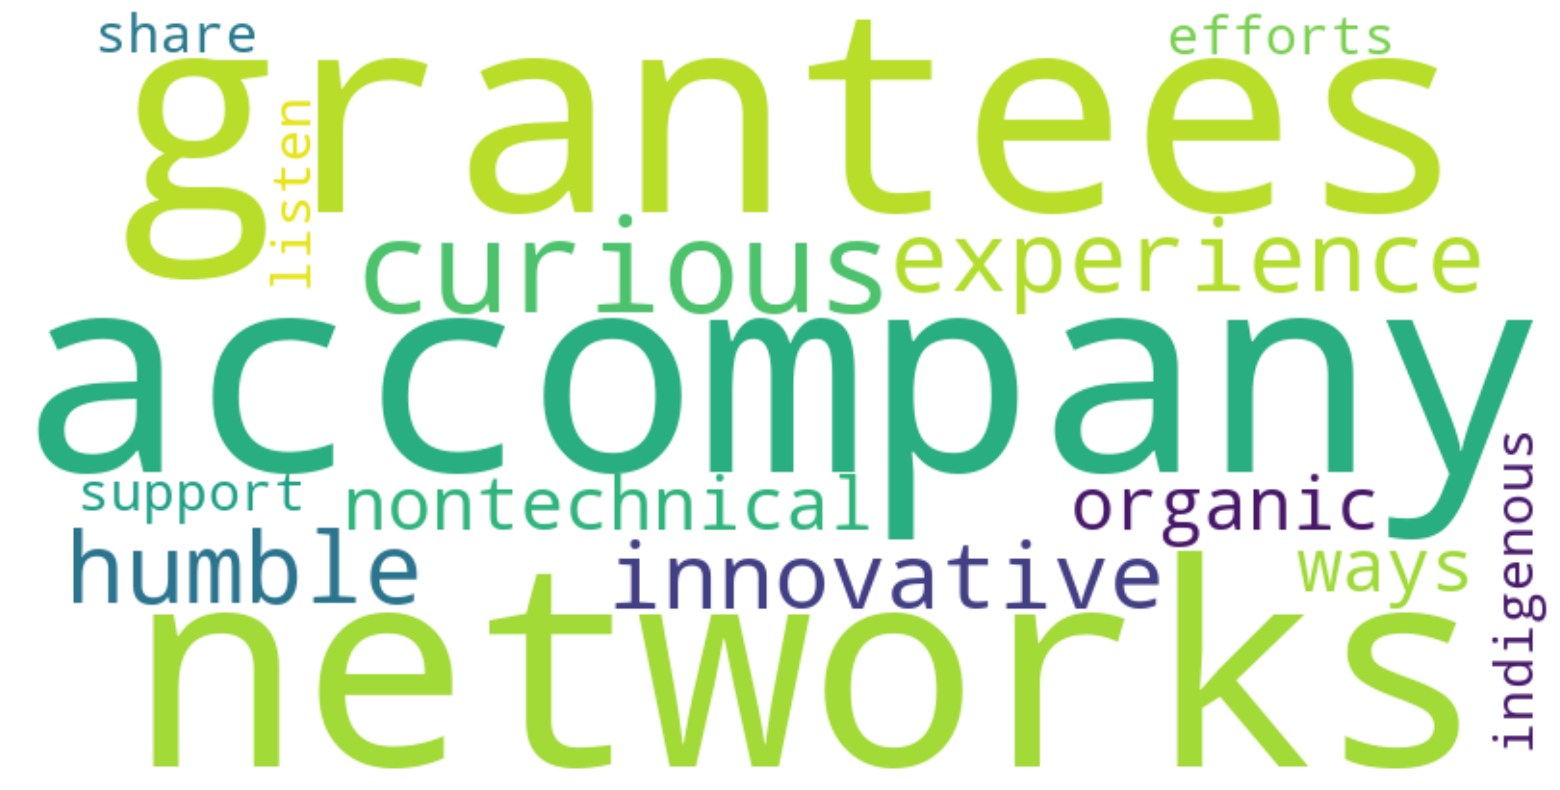

In [41]:
text = 'network_lead'
word_cloud(text, network_stripped)